# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# FIRST CELL
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data


training_file =  'traffic-signs-data/train.p'        
validation_file= 'traffic-signs-data/valid.p'        
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


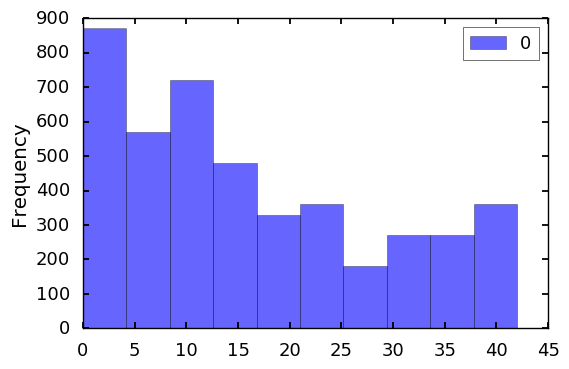

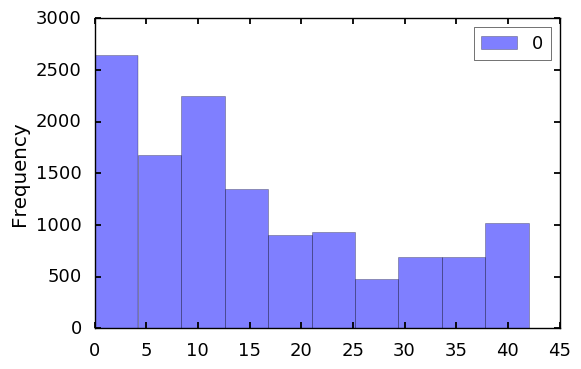

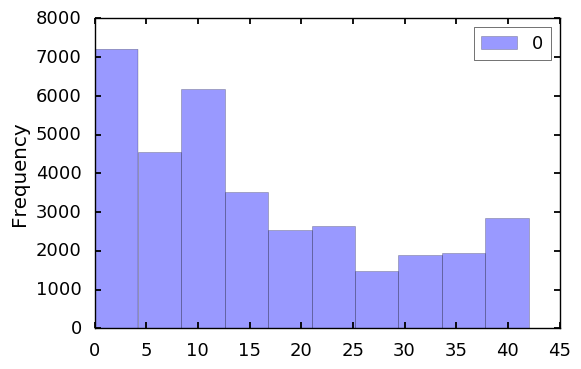

In [2]:
##  SECOND CELL
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
%matplotlib inline

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))



first = pd.DataFrame(y_valid)
second = pd.DataFrame(y_test)
third = pd.DataFrame(y_train)
plt.figure()
first.plot.hist(alpha=0.6)
second.plot.hist(alpha=0.5)
third.plot.hist(alpha=0.4)




print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(32, 32, 3)


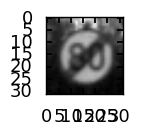

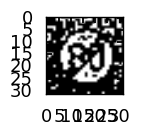

In [3]:
### THIRD CELL
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import cv2
# Visualizations will be shown in the notebook.
index = 21649 #random.randint(0,len(X_train))
print(X_train[index].shape)
#image = X_train[index]
image = cv2.cvtColor(X_train[index], cv2.COLOR_BGR2GRAY) #
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,0)
image = cv2.threshold(image, 25, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.










In [4]:
#### FOURTH CELL
### normalize and
### transform 32x32x3 RGB data to 32x32x5 data set
### (three channels for RGB + two channels for gray scale and monochromatic images)


from sklearn.utils import shuffle


thirtytwo = np.zeros((32,32))


def normalizator(img):
    return cv2.normalize(img, thirtytwo, 0, 255, cv2.NORM_MINMAX)


for i in range(len(X_train)):
    X_train[i] = normalizator(X_train[i])


for i in range(len(X_test)):
    X_test[i] = normalizator(X_test[i])
    

for i in range(len(X_valid)):
    X_valid[i] = normalizator(X_valid[i])
    
    

X_train_BW = np.zeros((len(X_train),32,32), dtype=np.uint8)
X_test_BW =  np.zeros((len(X_test),32,32), dtype=np.uint8)
X_valid_BW = np.zeros((len(X_valid),32,32), dtype=np.uint8)

X_train_BWW = np.zeros((len(X_train),32,32), dtype=np.uint8)
X_test_BWW =  np.zeros((len(X_test),32,32), dtype=np.uint8)
X_valid_BWW = np.zeros((len(X_valid),32,32), dtype=np.uint8)



def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def mono(img):
    return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,0)




for i in range(len(X_train)):
    X_train_BW[i] = gray(X_train[i])


for i in range(len(X_test)):
    X_test_BW[i] = gray(X_test[i])
    

for i in range(len(X_valid)):
    X_valid_BW[i] = gray(X_valid[i])

    


for i in range(len(X_train)):
    trainBWW = gray(X_train[i])
    X_train_BWW[i] = mono(trainBWW)

for i in range(len(X_test)):
    testBWW = gray(X_test[i])
    X_test_BWW[i] = mono(testBWW)

for i in range(len(X_valid)):
    validBWW = gray(X_valid[i])
    X_valid_BWW[i] = mono(validBWW)



sfx_X_train = np.reshape(X_train_BW, (len(X_train), 32, 32, 1))
ssfx_X_train = np.reshape(X_train_BWW, (len(X_train), 32, 32, 1))
X_train = np.concatenate((X_train, sfx_X_train, ssfx_X_train), axis=-1)

sfx_X_test = np.reshape(X_test_BW, (len(X_test), 32, 32, 1))
ssfx_X_test = np.reshape(X_test_BWW, (len(X_test), 32, 32, 1))
X_test = np.concatenate((X_test, sfx_X_test, ssfx_X_test), axis=-1)

sfx_X_valid = np.reshape(X_valid_BW, (len(X_valid), 32, 32, 1))
ssfx_X_valid = np.reshape(X_valid_BWW, (len(X_valid), 32, 32, 1))
X_valid = np.concatenate((X_valid, sfx_X_valid, ssfx_X_valid), axis=-1)


X_train, y_train = shuffle(X_train, y_train)



# Net Architecture (LeNet)

In [5]:
##### FIFTH CELL
### 32x32x5 input

import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 16 


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.10 
    
    # TODO: Layer 1: Convolutional. Input = 32x32x5. Output = 28x28x30.
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 5, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(30))
    conv1_M = tf.Variable(tf.truncated_normal(shape=(1, 1, 30, 30), mean = mu, stddev = sigma))
    conv1   = tf.nn.separable_conv2d(x, conv1_W, conv1_M, strides=[1, 1, 1, 1], padding='VALID') + conv1_b


    # TODO: Activation.
    
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x30. Output = 14x14x30.
    
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x120.
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 30, 4), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(120))
    conv2_M = tf.Variable(tf.truncated_normal(shape=(1, 1, 120, 120), mean = mu, stddev = sigma))
    conv2   = tf.nn.separable_conv2d(conv1, conv2_W, conv2_M, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    #conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.

    conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x120. Output = 5x5x120.
        
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x20. Output = 3000.
    
    fc0   = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 3000. Output = 516.
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3000, 516), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(516))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    
    # TODO: Activation.
    
    fc1    = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 516. Output = 258.
    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(516, 258), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(258))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    
    fc2    = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 258. Output = 43.
    
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(258, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 5))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)





### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [6]:
###### SIXTH CELL
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0003   

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...") 
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")



Training...

EPOCH 1 ...
Validation Accuracy = 0.875

EPOCH 2 ...
Validation Accuracy = 0.903

EPOCH 3 ...
Validation Accuracy = 0.918

EPOCH 4 ...
Validation Accuracy = 0.920

EPOCH 5 ...
Validation Accuracy = 0.930

EPOCH 6 ...
Validation Accuracy = 0.956

EPOCH 7 ...
Validation Accuracy = 0.949

EPOCH 8 ...
Validation Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.957

EPOCH 10 ...
Validation Accuracy = 0.950

EPOCH 11 ...
Validation Accuracy = 0.943

EPOCH 12 ...
Validation Accuracy = 0.958

EPOCH 13 ...
Validation Accuracy = 0.953

EPOCH 14 ...
Validation Accuracy = 0.937

EPOCH 15 ...
Validation Accuracy = 0.961

Model saved


In [7]:
####### SEVENTH CELL

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

    

Test Accuracy = 0.943


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [8]:
######## EIGTH CELL
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


X_test_new = np.zeros((5,32,32,3), dtype=np.uint8)

my_images = 'No_entry_1.jpeg','No_entry_2.jpeg','Children_crossing.jpeg','Stop.jpeg','Speed_limit_30kmh.jpeg'
my_dir = "web_images"
five = range(5)

for i in five :
        image = my_dir+'/'+my_images[i]
        img = plt.imread(image)
        img = img[0:32,0:32,:]
        X_test_new[i,:,:,:]=img
        
y_test_new = np.array((17,17,28,14,1))  # np.array((17,28,17,14,1))  


for i in range(len(X_test_new)):
    X_test_new[i] = normalizator(X_test_new[i])


X_test_new_BW =  np.zeros((len(X_test_new),32,32), dtype=np.uint8)
X_test_new_BWW =  np.zeros((len(X_test_new),32,32), dtype=np.uint8)



for i in range(len(X_test_new)):
    X_test_new_BW[i] = gray(X_test_new[i])
    
for i in range(len(X_test_new)):
    testBWW = gray(X_test_new[i])
    X_test_new_BWW[i] = mono(testBWW)


sfx_X_test_new = np.reshape(X_test_new_BW, (len(X_test_new), 32, 32, 1))
ssfx_X_test_new = np.reshape(X_test_new_BWW, (len(X_test_new), 32, 32, 1))
X_test_new = np.concatenate((X_test_new, sfx_X_test_new, ssfx_X_test_new), axis=-1) 

    

### Predict the Sign Type for Each Image

In [9]:
######### NINTH CELL
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_new, y_test_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))




Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [10]:
########## TENTH CELL
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.


prediction = tf.nn.softmax(logits) 

top5 = tf.nn.top_k(prediction, k=5) 

with tf.Session() as sess:    

    saver.restore(sess, tf.train.latest_checkpoint('.'))   

    top5_prediction = sess.run([prediction, top5], feed_dict={x: X_test_new})

print(top5_prediction)

[array([[  1.55462455e-16,   1.77354026e-25,   1.12922086e-24,
          5.16911863e-26,   5.68439385e-22,   1.35569182e-26,
          3.41124370e-31,   2.52344971e-26,   8.78864610e-25,
          7.22532139e-24,   1.76151284e-31,   8.41408170e-28,
          2.43464893e-27,   1.99874986e-19,   8.57789419e-16,
          3.07448724e-23,   1.89613927e-38,   1.00000000e+00,
          8.23310303e-28,   1.69043894e-26,   6.90114362e-21,
          5.61028621e-30,   9.35542885e-25,   8.59776912e-26,
          1.23649061e-36,   1.85807477e-23,   3.06106134e-25,
          6.96392815e-35,   2.90793599e-23,   3.48746119e-19,
          6.83041841e-24,   2.21965968e-26,   2.87358859e-29,
          5.03237874e-33,   7.06309136e-24,   6.87612210e-30,
          1.28368523e-26,   2.71459280e-30,   2.04510325e-19,
          5.51671348e-31,   8.28453718e-31,   1.12395774e-29,
          3.22065645e-32],
       [  1.72205219e-07,   4.33155549e-07,   1.48557089e-09,
          1.57362012e-06,   3.45640017e-10

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

# **Traffic Sign Recognition** 


---


[//]: # (Image References)



[imageA]: ./some_stuff/firstNen.jpeg "No_entry_1"
[imageB]: ./some_stuff/NenN.jpeg "No_entry_2"
[imageC]: ./some_stuff/Childre.jpeg "Children_crossing"
[imageD]: ./some_stuff/Stop.jpeg "Stop"
[imageE]: ./some_stuff/30kmh.jpeg "Speed_limit_30kmh"

[image1]: ./some_stuff/Sep_Conv.jpeg "Separable Convolution"
[image2]: ./some_stuff/Typ_Conv.jpeg "Typical Convolution"
[image3]: ./some_stuff/Data_Bars.jpeg "Input Data Bar Graph"
[image4]: ./some_stuff/Flow.jpeg "Flow"


---


### 1. Data Set Summary & Exploration


The code for this step is contained in the second code cell of the IPython notebook.  

* The size of training set is 34799x3
* The size of test set is 12630x3
* The shape of a traffic sign image is 32x32x3
* The number of unique classes/labels in the data set is 43


The code for this step is contained in the third code cell of the IPython notebook.  

Here is an exploratory visualization of the data set, a bar graph of training test showing that for some traffic signs there are more than double as many training sets as for others signs (1500 vs 7000):

![alt text][image3]

I decided not to change these propotions in order to see the implications in the model accuracy.

### 2. Design and Test a Model Architecture

The code for this step is contained in the fourth code cell of the IPython notebook.

As a first step, I decided to normalize the images to values between 0-255 with cv2.normalize(  ). Then the images were converted to grayscale with cv2.cvtColor(  ) and then to binary black and white with cv2.adaptiveThreshold(  ). The idea was not to reduce the data from 32x32x3 to 32x32x1 but to expand it to 32x32x5. 

The following image shows processing for the a new web image found in google's streetview (original data set have same processing):

![alt text][image4]



The difference between the original training data set and the augmented data set is 34799x3 vs 34799x5. Validation and test data set have similar diference.

I decided to augment the data sets in this way so that Neural Network could make a better generalization, by relating five versions of the same image with separable convolutional neural networks.

The code for my final model is located in the fifth cell of the ipython notebook. 

The final model is a LeNet adaptation as shown in the following table:


| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x5 (RGB + Gray Scale + Black & White)    | 
| SepConv 5x6x30        | 1x1 stride, valid padding, outputs 28x28x30 	|
| RELU					|												|
| Average pooling    	| 2x2 stride,  outputs 14x14x30 				|
| SepConv 30x4x120      | 1x1 stride, valid padding, outputs 10x10x120  |
| RELU	             	|            									|
| Average pooling		| 2x2 stride,  outputs 5x5x120      			|
| Flatten               | outputs 3000                                  |
| Fully connected		| outputs 516					     			|
| RELU					|												|
| Fully connected       | outputs 258                                   |
| RELU                  |                                               |
| Fully connected       | outputs 43                                    |



The code for training the model is located in the eigth cell of the ipython notebook. 

To train the model, I used a batch size of 16, 15 epochs and 0.0003 as learning rate.

The code for calculating the accuracy of the model is located in the sixth cell of the Ipython notebook.

My final model results were:

* validation set accuracy of 0.961
* test set accuracy of 0.943

The final architecture was derived from LeNet following the following iterative approach:

- baseline was the LeNet original architecture with 0.91 accuracy at the tenth traning epoch and 32x32x3 images as input.
- I began iterating reducing learning rate and adding epochs with augmented input of 32x32x6. (5 iterations)
- then I reduced the input to 32x32x5, and iterated with learing rates and epochs (5 iterations)
- then I changed to 1:6@input and 6:1@output and iterated with learing rates and epochs (5 iterations)
- then I changed from typical convolutions + max pools to separeble convolutions + average pools and iterated with learning rates and epochs (5 iterations)
- then I reduced the batch size and iterated learning rates and epochs (5 iterations)

The most important design choices were the number of input channels (and thus the use of separable convulotions) and the input to output ratio.

I decided to use Separable Convolutions to enable the Network to manage five channels at the input (LeNet originally had only one channel) without convoluting depthwise with all the channels at the early stage in order to reduce parametric complexity. Before taking this action the 32x32x5 input model was having an accuracy of 88%, much less than baseline Lenet 32x32x3 input model (91%).

Poolings were changed from max to average as advised in the lessons, but only after the 35x35x5 got around 90% accuracy with separable convolutions.

Finally I tried to keep the propotions of the orginal LeNet at the first and last layers; from 1:6 in the input and 8.4:1 (84:10) in the output to 1:6 in the input and 258:43 (6:1) in the output. 

(1:6):(6:1) looks much nicer than (1:6):(8.4:1) though.

![alt text][image1]

[Snapshot from Vincent Vanhoucke's "Learning Visual Representations at Scale" pg.30](https://bcb9f395-a-8ac90a7d-s-sites.googlegroups.com/a/vanhoucke.com/vincent/publications/vanhoucke-iclr14.pdf?attachauth=ANoY7cqY_8tpwUHshUqxJvPUlQDMOlkbVWG_XbfTAXLAX-w0rxGk4eZ6yd7OPpkzHx2mmTLiWLEjtuQn3fQLymqR2MWPTToCk3w1SmGQCGxgRYx2xyuKJNbzFAqkXHygHXW8Uf5DGfQympO7TT7oD9qKfaU6n8vPisAtVdBPxiZatXNAEAI5JcZ3ag1X_LIdIm2qpdXJ4tjnX7jVzJvZh4ie1KnhzglFlYu2mKLj_XmK6drjMviS2Ks%3D&attredirects=0)




### 3. Test a Model on New Images


Here are five German traffic signs that I found on the web:


The first image is a ["No entry" sign at Stuttgart](https://www.google.com.mx/maps/@48.7745537,9.17997,3a,75y,2.78h,81.28t/data=!3m6!1e1!3m4!1sGgpEUooDeH_TX7byCR39AQ!2e0!7i13312!8i6656) that leaves an empty space in the bottom.

![alt text][imageA]

The secong image is an [occluded "No entry" sign at Stuttgart](https://www.google.com.mx/maps/@48.7702273,9.1439989,3a,89.8y,57.44h,82.42t/data=!3m6!1e1!3m4!1s6wa2i8dUsj25bspOSr21_w!2e0!7i13312!8i6656) that might be difficult to classify because almost a third of it is covered with leaves.

![alt text][imageB]

The third is a ["Children crossing" sign at Stuttgart](https://www.google.com.mx/maps/@48.769348,9.1630426,3a,75y,57.15h,80.65t/data=!3m6!1e1!3m4!1ssC0vJJwE2KrcSwklmjezMw!2e0!7i13312!8i6656)

![alt text][imageC]

The fourth is a ["Stop" sign at Stuttgart](https://www.google.com.mx/maps/@48.769432,9.1731114,3a,75y,115.84h,77.56t/data=!3m6!1e1!3m4!1siiQQZB9CXu9ZMNA4IOVoRQ!2e0!7i13312!8i6656) that is tilted and leaves an empy space in the bottom.

![alt text][imageD]

The las picture is a [30kmh Speed limit sign at Stuttgart](https://www.google.com.mx/maps/@48.772999,9.1838682,3a,34.5y,333.75h,90t/data=!3m6!1e1!3m4!1srFdGx9jifw9-R_M6K6JjSw!2e0!7i13312!8i6656) that should not bring any problems.

![alt_text][imageE]


The code for making predictions on my final model is located in the tenth cell of the Ipython notebook.

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| No entry      		| No entry  									| 
| No entry     			| No entry										|
| Children Crossing		| Children Crossing								|
| Stop	      		    | Stop			        		 				|
| Speed limit (30km/h)	| Speed limit (30km/h)							|


The model was able to correctly guess all of the 5 traffic signs, which gives an accuracy of 100%. This compares favorably to the accuracy on the test set of 94.3%


The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.

For the first image, the model is very sure that this is a "No entry sign" (probability of 1.00), and the image does contain a stop sign. The top five soft max probabilities were:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.00         			| No entry  					    			| 
| 9e-16                 | Stop                                          | 
| 2e-16                 | Speed limit (20km/h)	     			     	|
| 3e-19		            | Bicycles Crossing  			 				|
| 2e-19         	    | Keep right             						|


For the second image, even with a 1/3 occlusion, the model predicted it with 93% certanty.

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 0.9333       			| No entry  					    			| 
| 0.0606                | No passing                       				|
| 0.0025   	            | Priority Road	  		                		|
| 0.0024	            | End of no passing    			 				|
| 0.0005       	        | Children crossing        						|


For the third image it was pretty sure it was a Children Crossing sign even when it was the sign with least training images (around 1,200 samples) vs other signs (over 7,000 sample sets)

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 0.99         			| Children Crossing  			    			| 
| 1e-4                  | Dangerous curve to the left     				|
| 1e-5    	            | Ahead only 	                 				|
| 1e-6		            | Slippery road             	 				|
| 1e-7         	        | Dangerous curve to the right    				|



For the fourth image the model was correct althou not pretty sure, both sign had around the same number of trainnning sets 3,500 sample sets. The model could differentiate shape (octagon vs. circle) and lines (single horizontal line  vs horizontal S T O P lettes)

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 0.63280      			| Stop              			    			| 
| 0.36581               | No Entry                      				|
| 0.00070  	            | Yield                         				|
| 0.00060	            | Priority Road               	 				|
| 0.00003      	        | Speed limit (20km/h)                       	|



For the fifth image the model was not so sure it was right, I think this is due to the fact that more than one fourth of the 43 classes are of the same type (round red circle with black figures in the center).

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 0.550      			| Speed limit (30km/h)    		    			| 
| 0.300                 | Bicycles crossing                      		|
| 0.135   	            | Speed limit (20km/h)            				|
| 0.009  	            | Keep right                	 				|
| 0.005      	        | Road Work                                 	|






